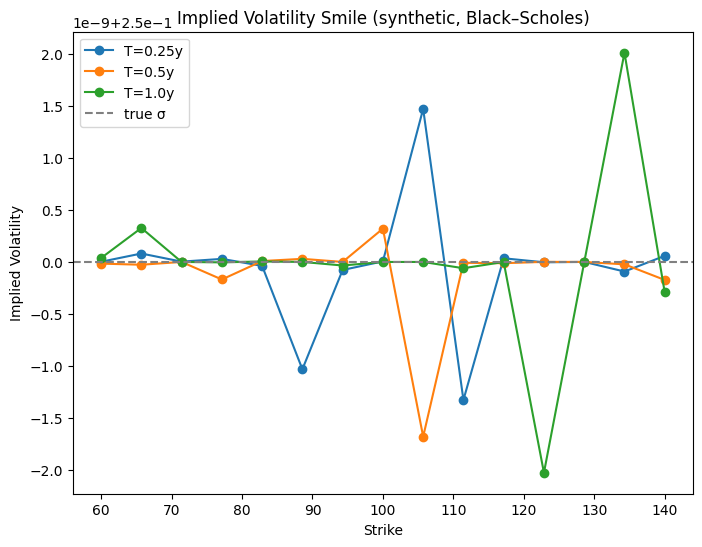

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from blackscholes.pricing import price_call
from blackscholes.iv import implied_vol

# Parameters
S, r, q = 100, 0.02, 0.0
true_sigma = 0.25
Ts = [0.25, 0.5, 1.0]   # maturities
Ks = np.linspace(60, 140, 15)  # strikes

plt.figure(figsize=(8,6))

for T in Ts:
    market_prices = [price_call(S, K, r, q, true_sigma, T) for K in Ks]
    ivs = [implied_vol(p, S, K, r, q, T, kind="call") for p,K in zip(market_prices, Ks)]
    plt.plot(Ks, ivs, marker="o", label=f"T={T}y")

plt.axhline(true_sigma, color="gray", linestyle="--", label="true σ")
plt.xlabel("Strike")
plt.ylabel("Implied Volatility")
plt.title("Implied Volatility Smile (synthetic, Black–Scholes)")
plt.legend()
plt.show()


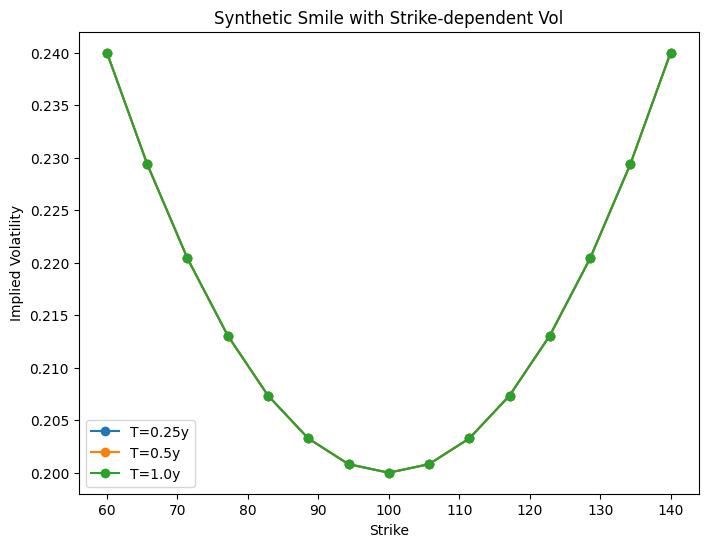

In [2]:
def smile_vol(K, S):
    # U-shaped smile: lowest at ATM, higher in wings
    moneyness = (K/S - 1)
    return 0.20 + 0.25 * moneyness**2

plt.figure(figsize=(8,6))
for T in Ts:
    market_prices = [price_call(S, K, r, q, smile_vol(K,S), T) for K in Ks]
    ivs = [implied_vol(p, S, K, r, q, T, kind="call") for p,K in zip(market_prices, Ks)]
    plt.plot(Ks, ivs, marker="o", label=f"T={T}y")

plt.xlabel("Strike")
plt.ylabel("Implied Volatility")
plt.title("Synthetic Smile with Strike-dependent Vol")
plt.legend()
plt.show()


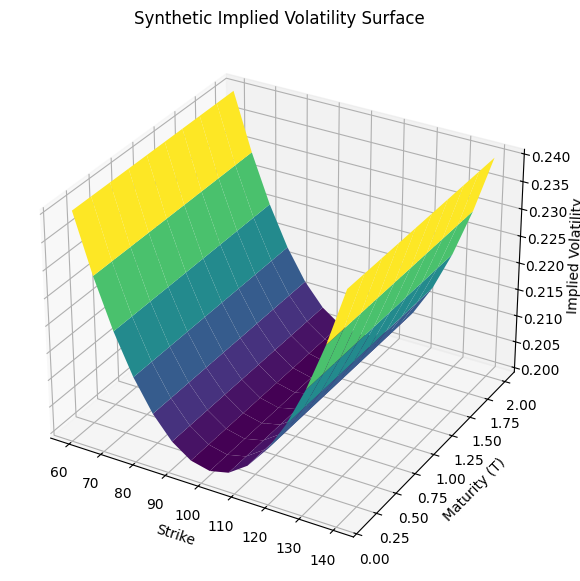

In [3]:
from mpl_toolkits.mplot3d import Axes3D

Ts = np.linspace(0.1, 2.0, 10)   # maturities
Ks = np.linspace(60, 140, 15)
K_grid, T_grid = np.meshgrid(Ks, Ts)

IV_grid = np.zeros_like(K_grid)
for i, T in enumerate(Ts):
    for j, K in enumerate(Ks):
        sigma = smile_vol(K, S)  # use strike-dependent vol
        price = price_call(S, K, r, q, sigma, T)
        IV_grid[i, j] = implied_vol(price, S, K, r, q, T, kind="call")

fig = plt.figure(figsize=(10,7))
ax = fig.add_subplot(111, projection="3d")
ax.plot_surface(K_grid, T_grid, IV_grid, cmap="viridis")
ax.set_xlabel("Strike")
ax.set_ylabel("Maturity (T)")
ax.set_zlabel("Implied Volatility")
ax.set_title("Synthetic Implied Volatility Surface")
plt.show()
